<a href="https://colab.research.google.com/github/AlexandrePardelinha/Computer-Science-Masters/blob/main/C%C3%B3pia_de_Trabalho_Final_M%C3%A9todos_Estat%C3%ADsticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este trabalho faz parte das atividades avaliativas da disciplina de Métodos Estatísticos, período 2022/3.

Exploração do conjunto de dados:

Foi escolhida uma base de dados sobre análise de filas em bancos selecionados no estado de Ogun, Nigéria, referentes ao ano de 2018. Os dados são referentes a três bancos, e foram coletados durante 12 semanas, 4 em cada banco.

Variáveis:

chegada - Horário de chegada ao banco. O tempo será representado em minutos, onde 0 = 08:00 (horário de abertura do banco) e 420 = 15:00 (horário de fechamento do banco).

tempo_total - Tempo total gasto desde a chegada até o processamento da demanda.

tempo_fila - Tempo gasto da chegada até o início do atendimento.

tempo_processamento - Tempo gasto para processamento da demanda de cada cliente.

O próximo bloco de código é onde todos os dados de todos os bancos são tratados e carregados na memória a partir dos arquivos.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import csv

dados = {}
for b in ["FIRST", "SECOND", "THIRD"]:
  for s in range(1,5): 
    for j in range(1,6):
      banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
      banco_arq = "/content/drive/My Drive/Colab Notebooks/" + banco
      arq = open(banco_arq, "r")
      arq_csv = csv.reader(arq, delimiter = ";")
      chegadas = []
      tempos_fila = []
      tempos_processamento = []
      tempos_totais = []
      for i, linha in enumerate(arq_csv):
          if i == 0:
              pass
          else:
              chegada = linha[1]
              chegada = chegada.replace(" ", "")
              chegada = chegada.replace(":", "")
              chegada = chegada.replace(",", "")
              chegada = chegada.replace("00/01/1900", "")
              if len(chegada) == 1:
                  chegada_h = int(chegada)
                  chegada_min = 0
              elif len(chegada) == 2 and chegada[0] != "1":
                  chegada_h = int(chegada[0])
                  chegada_min = int(chegada[1])*10
              elif len(chegada) == 2:
                  chegada_h = int(chegada)
                  chegada_min = 0
              elif len(chegada) == 3 and not (chegada[0] == "8" or chegada[0] == "9"):
                  chegada_h = int(chegada[:2])
                  chegada_min = int(chegada[2])*10
              elif chegada[0] == "8" or chegada[0] == "9":
                  chegada_h = int(chegada[0])
                  chegada_min = int(chegada[1:])
              else:
                  chegada_h = int(chegada[:2])
                  chegada_min = int(chegada[2:])
              chegada_tempos_relogio = (chegada_h-8)*60 + chegada_min
              chegadas.append(chegada_tempos_relogio)
              tempos_fila.append(int(linha[2]))
              tempos_processamento.append(int(linha[3]))
              tempos_totais.append(int(linha[4]))
      arq.close()
      dados[banco] = {"chegada": chegadas,
                      "tempo_fila": tempos_fila,
                      "tempo_processamento": tempos_processamento,
                      "tempo_total": tempos_totais}

Mounted at /content/drive


No próximo bloco é impresso um exemplo de como estão os formatos dos dados após o tratamento.

In [ ]:
import pandas as pd
teste_df = pd.DataFrame(dados["FIRST BANK (WEEK 1)_1.csv"])
display(teste_df)
teste_df.info()

,chegada,tempo_fila,tempo_processamento,tempo_total
0,0,11,28,39
1,0,13,25,38
2,0,14,26,40
3,0,9,26,35
4,0,14,23,37
...,...,...,...,...
875,418,11,23,34
876,419,15,27,42
877,419,14,27,41
878,419,13,29,42


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   chegada              880 non-null    int64
 1   tempo_fila           880 non-null    int64
 2   tempo_processamento  880 non-null    int64
 3   tempo_total          880 non-null    int64
dtypes: int64(4)
memory usage: 27.6 KB


In [ ]:
dados_df = pd.DataFrame(dados)
dados_df.head()

,FIRST BANK (WEEK 1)_1.csv,FIRST BANK (WEEK 1)_2.csv,FIRST BANK (WEEK 1)_3.csv,FIRST BANK (WEEK 1)_4.csv,FIRST BANK (WEEK 1)_5.csv,FIRST BANK (WEEK 2)_1.csv,FIRST BANK (WEEK 2)_2.csv,FIRST BANK (WEEK 2)_3.csv,FIRST BANK (WEEK 2)_4.csv,FIRST BANK (WEEK 2)_5.csv,...,THIRD BANK (WEEK 3)_1.csv,THIRD BANK (WEEK 3)_2.csv,THIRD BANK (WEEK 3)_3.csv,THIRD BANK (WEEK 3)_4.csv,THIRD BANK (WEEK 3)_5.csv,THIRD BANK (WEEK 4)_1.csv,THIRD BANK (WEEK 4)_2.csv,THIRD BANK (WEEK 4)_3.csv,THIRD BANK (WEEK 4)_4.csv,THIRD BANK (WEEK 4)_5.csv
chegada,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, ...","[0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 4, 5, 6, 6, 6, ...","[0, 0, 1, 2, 3, 4, 4, 5, 5, 5, 6, 7, 7, 8, 9, ...","[0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, ...","[0, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 5, 6, 7, 7, ...","[0, 0, 0, 1, 1, 2, 3, 4, 4, 5, 5, 5, 6, 7, 7, ...","[0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, ...","[0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, ...","[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, ...","[0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 4, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 3, ...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 4, 4, ..."
tempo_fila,"[11, 13, 14, 9, 14, 10, 9, 10, 11, 12, 11, 14,...","[3, 6, 4, 5, 3, 7, 6, 6, 3, 3, 7, 7, 6, 6, 5, ...","[4, 7, 5, 6, 4, 8, 7, 7, 4, 4, 8, 8, 7, 7, 6, ...","[7, 8, 11, 9, 14, 11, 15, 10, 10, 11, 8, 14, 9...","[14, 15, 17, 16, 20, 17, 20, 16, 16, 17, 15, 1...","[19, 16, 21, 24, 24, 25, 15, 19, 24, 16, 17, 1...","[17, 22, 17, 17, 20, 23, 18, 20, 22, 21, 18, 2...","[19, 20, 23, 22, 27, 24, 28, 22, 23, 24, 20, 2...","[19, 23, 19, 19, 21, 24, 19, 21, 26, 22, 20, 2...","[22, 25, 22, 22, 24, 26, 22, 24, 27, 24, 23, 2...",...,"[14, 19, 15, 18, 19, 17, 15, 15, 14, 15, 19, 1...","[8, 5, 6, 9, 6, 11, 9, 5, 10, 7, 6, 6, 11, 11,...","[10, 11, 14, 12, 11, 10, 11, 12, 13, 15, 13, 1...","[11, 8, 8, 7, 7, 10, 8, 9, 10, 10, 10, 9, 7, 9...","[4, 7, 5, 5, 4, 5, 4, 6, 5, 7, 7, 6, 4, 7, 8, ...","[13, 12, 13, 13, 11, 12, 13, 10, 15, 12, 10, 1...","[14, 16, 14, 17, 18, 16, 12, 17, 16, 14, 13, 1...","[15, 14, 13, 14, 14, 16, 17, 16, 18, 15, 16, 1...","[8, 13, 9, 11, 10, 7, 8, 9, 12, 9, 8, 11, 10, ...","[10, 12, 11, 8, 9, 10, 12, 9, 12, 13, 9, 13, 1..."
tempo_processamento,"[28, 25, 26, 26, 23, 26, 27, 27, 26, 24, 28, 2...","[14, 21, 17, 20, 15, 24, 21, 22, 14, 15, 24, 2...","[5, 9, 7, 9, 5, 11, 9, 10, 5, 6, 11, 11, 10, 9...","[8, 11, 20, 15, 14, 21, 32, 17, 18, 22, 10, 14...","[11, 12, 15, 13, 18, 15, 19, 14, 14, 15, 12, 1...","[13, 15, 11, 13, 14, 15, 16, 12, 12, 11, 13, 1...","[15, 18, 15, 15, 17, 19, 15, 17, 20, 17, 16, 2...","[17, 18, 19, 18, 21, 19, 21, 19, 19, 19, 17, 2...","[7, 9, 7, 7, 8, 10, 7, 8, 11, 8, 7, 11, 10, 9,...","[16, 20, 16, 16, 18, 21, 16, 18, 23, 19, 17, 2...",...,"[7, 12, 9, 8, 10, 10, 7, 7, 8, 13, 9, 8, 13, 1...","[6, 8, 5, 6, 5, 6, 6, 6, 4, 8, 7, 4, 7, 8, 7, ...","[8, 9, 9, 6, 8, 8, 7, 7, 9, 5, 7, 6, 5, 6, 7, ...","[8, 10, 10, 11, 10, 10, 8, 11, 7, 7, 10, 11, 9...","[11, 11, 11, 8, 10, 10, 11, 8, 11, 7, 7, 9, 9,...","[14, 11, 10, 14, 11, 12, 10, 11, 15, 13, 14, 9...","[9, 9, 9, 10, 6, 9, 6, 9, 9, 7, 7, 7, 9, 8, 7,...","[14, 13, 12, 13, 14, 14, 16, 15, 13, 15, 16, 1...","[11, 9, 8, 10, 10, 6, 8, 6, 8, 5, 9, 7, 9, 10,...","[13, 17, 12, 14, 14, 14, 14, 17, 12, 12, 14, 1..."
tempo_total,"[39, 38, 40, 35, 37, 36, 36, 37, 37, 36, 39, 3...","[17, 26, 21, 25, 18, 31, 27, 28, 17, 19, 31, 3...","[9, 16, 12, 15, 10, 19, 16, 17, 9, 10, 19, 18,...","[15, 20, 30, 25, 28, 32, 47, 27, 28, 33, 18, 2...","[25, 27, 31, 29, 38, 32, 39, 30, 30, 33, 26, 3...","[32, 31, 32, 37, 38, 39, 31, 31

Média ou Valor Esperado de uma variável:

Seja $X$ uma variável aleatória discreta. A média (ou esperança) de $X$, denotada por $\mu$ ou $E(X)$ é um valor único, que atua como representante dos valores de $X$, e por essa razão costuma-se chamar uma medida de tendência central. Esta medida é calculada da seguinte maneira:
$$\mu = E(X) = \sum_x xf(x),$$
onde $f(x)$ é a função que associada a cada $x$ a chance deste evento ocorrer.

Variância de uma variável:

Seja $X$ uma variável aleatória. A variância é uma medida de dispersão dos valores da variável aleatória ao redor da média, e é denotada por $\sigma^2$ ou $V(X)$. Se os valores tendem a concentrar-se próximos da média, a variância é pequena; mas se os valores tendem a afastar-se da média, a variância é grande. Esta medida de dispersão é calculada da seguinte maneira:

$$\sigma^2 = V(X) = E(X - \mu)^2 = \sum_x (x-\mu)^2f(x) = \sum_x x^2f(x) - \mu^2.$$

Desvio Padrão da variável:

Seja $X$ uma variável aleatória. O desvio padrão de $X$ é a raiz quadrada da variância de $X$, ou seja
$$\sigma = \sqrt{\sigma^2}.$$ 

##############################################################################
No próximo bloco calcularemos o tempo médio de espera na fila para cada dia coletado dos bancos e veremos qual a maior média de espera e o dia em que ela ocorre em cada banco. Consideraremos o dia 0 como a segunda-feira da primeira semana, e o dia 19 como a sexta-feira da quarta semana.

Aqui analisaremos as variâcias referentes aos dias que apresentaram as maiores médias. 

A seguir, veremos os desvios padrões para as variáveis que estudamos acima.

In [ ]:
import math

for b in ["FIRST", "SECOND", "THIRD"]:
  media_fila = []
  variancia_fila = []
  for s in range(1,5): 
      for j in range(1,6):
        banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
        banco_df = pd.DataFrame(dados[banco])
        media_fila.append(banco_df["tempo_fila"].mean())
        variancia_fila.append(banco_df["tempo_fila"].var())
  maior_media_espera = max(media_fila)
  menor_media_espera = min(media_fila)
  if b == "FIRST":
    dia_maior = media_fila.index(maior_media_espera)
    dia_menor = media_fila.index(menor_media_espera)
    print("No 1º banco o maior tempo médio de espera na fila é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s.\nO menor tempo médio de espera na fila é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s." %(maior_media_espera, variancia_fila[dia_maior], math.sqrt(variancia_fila[dia_maior]), dia_maior, menor_media_espera, variancia_fila[dia_menor], math.sqrt(variancia_fila[dia_menor]), dia_menor))                                 
  if b == "SECOND":
    dia_maior = media_fila.index(maior_media_espera)
    dia_menor = media_fila.index(menor_media_espera)
    print("\nNo 2º banco o maior tempo médio de espera na fila é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s.\nO menor tempo médio de espera na fila é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s." %(maior_media_espera, variancia_fila[dia_maior], math.sqrt(variancia_fila[dia_maior]), dia_maior, menor_media_espera, variancia_fila[dia_menor], math.sqrt(variancia_fila[dia_menor]), dia_menor))                                 
  if b == "THIRD":
    dia_maior = media_fila.index(maior_media_espera)
    dia_menor = media_fila.index(menor_media_espera)
    print("\nNo 3º banco o maior tempo médio de espera na fila é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s.\nO menor tempo médio de espera na fila é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s." %(maior_media_espera, variancia_fila[dia_maior], math.sqrt(variancia_fila[dia_maior]), dia_maior, menor_media_espera, variancia_fila[dia_menor], math.sqrt(variancia_fila[dia_menor]), dia_menor))                                 

No 1º banco o maior tempo médio de espera na fila é de 25.067173637515843 minutos, com variância de 3.057664717273681 e desvio padrão 1.7486179449135482. Estes dados são do dia 9.
O menor tempo médio de espera na fila é de 4.934722222222222 minutos, com variância de 1.5492794776696033 e desvio padrão 1.2447005574312253. Estes dados são do dia 1 

No 2º banco o maior tempo médio de espera na fila é de 29.925414364640883 minutos, com variância de 8.910058610913703 e desvio padrão 2.9849721290011577. Estes dados são do dia 12.
O menor tempo médio de espera na fila é de 6.995044598612488 minutos, com variância de 1.4791420863026417 e desvio padrão 1.2161998545891386. Estes dados são do dia 16 

No 3º banco o maior tempo médio de espera na fila é de 21.938496583143507 minutos, com variância de 3.2025984213110035 e desvio padrão 1.7895805154591407. Estes dados são do dia 3.
O menor tempo médio de espera na fila é de 6.015847860538828 minutos, com variância de 1.5076849545946218 e desvio padr

In [ ]:
import math

for b in ["FIRST", "SECOND", "THIRD"]:
  media_processamento = []
  variancia_processamento = []
  for s in range(1,5): 
      for j in range(1,6):
        banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
        banco_df = pd.DataFrame(dados[banco])
        media_processamento.append(banco_df["tempo_processamento"].mean())
        variancia_processamento.append(banco_df["tempo_processamento"].var())
  maior_media_espera = max(media_processamento)
  menor_media_espera = min(media_processamento)
  if b == "FIRST":
    dia_maior = media_processamento.index(maior_media_espera)
    dia_menor = media_processamento.index(menor_media_espera)
    print("No 1º banco o maior tempo médio de processamento é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s.\nO menor tempo médio de espera na processamento é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s." %(maior_media_espera, variancia_processamento[dia_maior], math.sqrt(variancia_processamento[dia_maior]), dia_maior, menor_media_espera, variancia_processamento[dia_menor], math.sqrt(variancia_processamento[dia_menor]), dia_menor))                                 
  if b == "SECOND":
    dia_maior = media_processamento.index(maior_media_espera)
    dia_menor = media_processamento.index(menor_media_espera)
    print("\nNo 2º banco o maior tempo médio de processamento é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s.\nO menor tempo médio de espera na processamento é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s." %(maior_media_espera, variancia_processamento[dia_maior], math.sqrt(variancia_processamento[dia_maior]), dia_maior, menor_media_espera, variancia_processamento[dia_menor], math.sqrt(variancia_processamento[dia_menor]), dia_menor))                                 
  if b == "THIRD":
    dia_maior = media_processamento.index(maior_media_espera)
    dia_menor = media_processamento.index(menor_media_espera)
    print("\nNo 3º banco o maior tempo médio de processamento é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s.\nO menor tempo médio de espera na processamento é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s." %(maior_media_espera, variancia_processamento[dia_maior], math.sqrt(variancia_processamento[dia_maior]), dia_maior, menor_media_espera, variancia_processamento[dia_menor], math.sqrt(variancia_processamento[dia_menor]), dia_menor))                                 

No 1º banco o maior tempo médio de processamento é de 25.979545454545455 minutos, com variância de 3.078079429103319 e desvio padrão 1.7544456187363913. Estes dados são do dia 0.
O menor tempo médio de espera na processamento é de 5.995269631031221 minutos, com variância de 1.4895609357529886 e desvio padrão 1.2204757005991511. Estes dados são do dia 17.

No 2º banco o maior tempo médio de processamento é de 32.058013765978366 minutos, com variância de 5.34604053918039 e desvio padrão 2.3121506307289734. Estes dados são do dia 15.
O menor tempo médio de espera na processamento é de 5.975295381310419 minutos, com variância de 1.4864857997528385 e desvio padrão 1.2192152393047089. Estes dados são do dia 4.

No 3º banco o maior tempo médio de processamento é de 17.970319634703195 minutos, com variância de 3.2311180691454657 e desvio padrão 1.7975311038047341. Estes dados são do dia 5.
O menor tempo médio de espera na processamento é de 5.962413452027695 minutos, com variância de 1.4500710

In [ ]:
import math

for b in ["FIRST", "SECOND", "THIRD"]:
  media_total = []
  variancia_total = []
  for s in range(1,5): 
      for j in range(1,6):
        banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
        banco_df = pd.DataFrame(dados[banco])
        media_total.append(banco_df["tempo_total"].mean())
        variancia_total.append(banco_df["tempo_total"].var())
  maior_media_espera = max(media_total)
  menor_media_espera = min(media_total)
  if b == "FIRST":
    dia_maior = media_total.index(maior_media_espera)
    dia_menor = media_total.index(menor_media_espera)
    print("No 1º banco o maior tempo total é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s.\nO menor tempo médio de espera na total é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s." %(maior_media_espera, variancia_total[dia_maior], math.sqrt(variancia_total[dia_maior]), dia_maior, menor_media_espera, variancia_total[dia_menor], math.sqrt(variancia_total[dia_menor]), dia_menor))                                 
  if b == "SECOND":
    dia_maior = media_total.index(maior_media_espera)
    dia_menor = media_total.index(menor_media_espera)
    print("\nNo 2º banco o maior tempo total é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s.\nO menor tempo médio de espera na total é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s." %(maior_media_espera, variancia_total[dia_maior], math.sqrt(variancia_total[dia_maior]), dia_maior, menor_media_espera, variancia_total[dia_menor], math.sqrt(variancia_total[dia_menor]), dia_menor))                                 
  if b == "THIRD":
    dia_maior = media_total.index(maior_media_espera)
    dia_menor = media_total.index(menor_media_espera)
    print("\nNo 3º banco o maior tempo total é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s.\nO menor tempo médio de espera na total é de %s minutos, com variância de %s e desvio padrão %s. Estes dados são do dia %s." %(maior_media_espera, variancia_total[dia_maior], math.sqrt(variancia_total[dia_maior]), dia_maior, menor_media_espera, variancia_total[dia_menor], math.sqrt(variancia_total[dia_menor]), dia_menor))                                 

No 1º banco o maior tempo total é de 45.133079847908746 minutos, com variância de 16.044450020265966 e desvio padrão 4.005552398891564. Estes dados são do dia 9.
O menor tempo médio de espera na total é de 13.868627450980393 minutos, com variância de 8.799211068136774 e desvio padrão 2.9663464174193774. Estes dados são do dia 2.

No 2º banco o maior tempo total é de 43.945454545454545 minutos, com variância de 6.852980132450331 e desvio padrão 2.6178197287915626. Estes dados são do dia 14.
O menor tempo médio de espera na total é de 15.925886143931256 minutos, com variância de 4.593425961216405 e desvio padrão 2.1432279302996227. Estes dados são do dia 4.

No 3º banco o maior tempo total é de 31.996749729144096 minutos, com variância de 6.2939156715698825 e desvio padrão 2.5087677595923226. Estes dados são do dia 6.
O menor tempo médio de espera na total é de 13.981541802388708 minutos, com variância de 4.25944153330501 e desvio padrão 2.0638414506218763. Estes dados são do dia 2.


A seguir, vemos os histogramas de frequência para alguns dos conjuntos tratados.

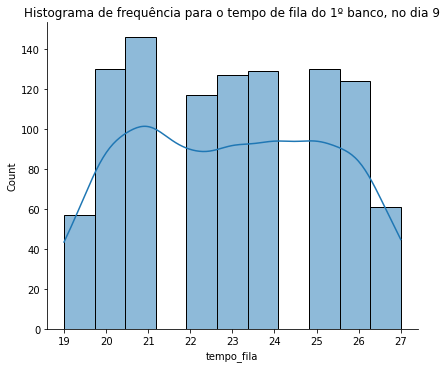

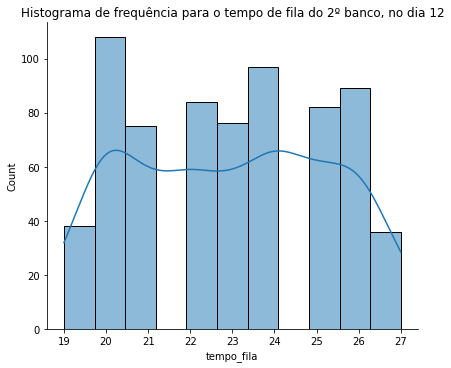

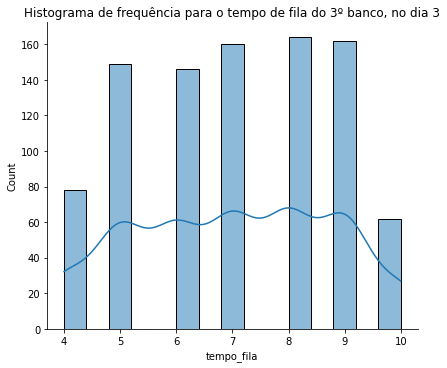

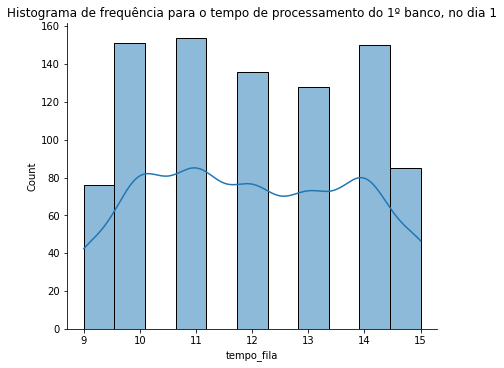

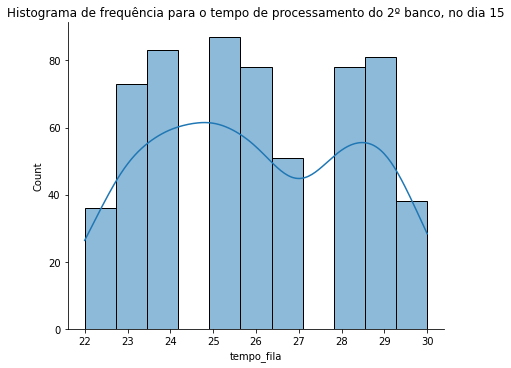

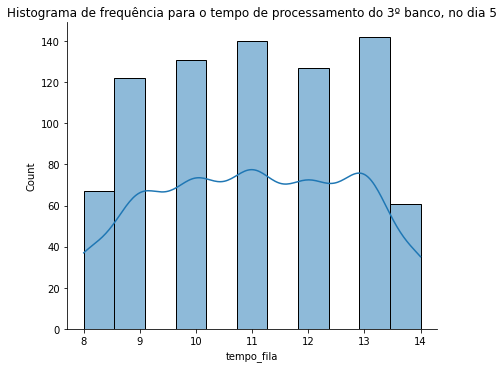

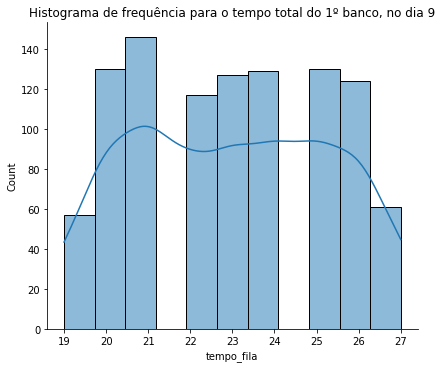

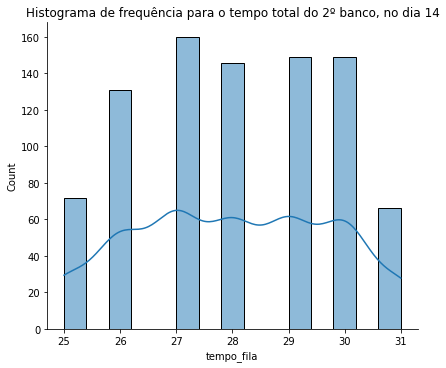

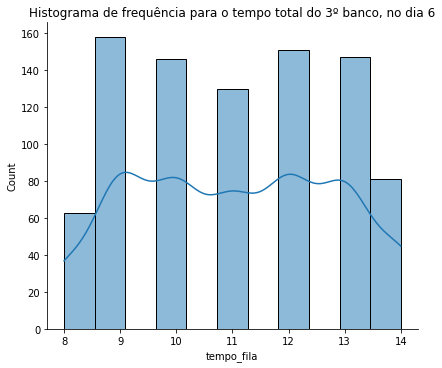

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

banco = "FIRST BANK (WEEK 2)_4.csv"
banco_df = pd.DataFrame(dados[banco])
sns.displot(banco_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de fila do 1º banco, no dia 9')
plt.show()

banco = "SECOND BANK (WEEK 3)_2.csv"
banco_df = pd.DataFrame(dados[banco])
sns.displot(banco_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de fila do 2º banco, no dia 12')
plt.show()

banco = "THIRD BANK (WEEK 1)_3.csv"
banco_df = pd.DataFrame(dados[banco])
sns.displot(banco_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de fila do 3º banco, no dia 3')
plt.show()

banco = "FIRST BANK (WEEK 1)_1.csv"
banco_df = pd.DataFrame(dados[banco])
sns.displot(banco_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de processamento do 1º banco, no dia 1')
plt.show()

banco = "SECOND BANK (WEEK 3)_5.csv"
banco_df = pd.DataFrame(dados[banco])
sns.displot(banco_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de processamento do 2º banco, no dia 15')
plt.show()

banco = "THIRD BANK (WEEK 1)_5.csv"
banco_df = pd.DataFrame(dados[banco])
sns.displot(banco_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de processamento do 3º banco, no dia 5')
plt.show()

banco = "FIRST BANK (WEEK 2)_4.csv"
banco_df = pd.DataFrame(dados[banco])
sns.displot(banco_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo total do 1º banco, no dia 9')
plt.show()

banco = "SECOND BANK (WEEK 3)_4.csv"
banco_df = pd.DataFrame(dados[banco])
sns.displot(banco_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo total do 2º banco, no dia 14')
plt.show()

banco = "THIRD BANK (WEEK 2)_1.csv"
banco_df = pd.DataFrame(dados[banco])
sns.displot(banco_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo total do 3º banco, no dia 6')
plt.show()

Box-plot das variáveis:

Box-plot é um diagrama de caixa utilizando as referências de valores mínimos e máximos, quartis e outliers de uma base de dados.

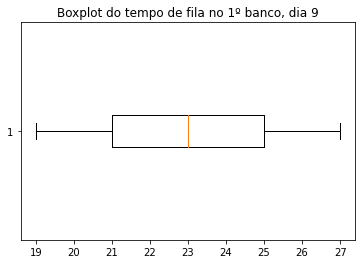

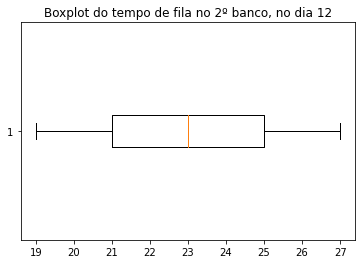

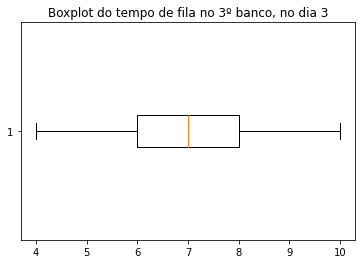

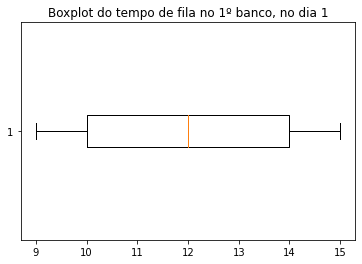

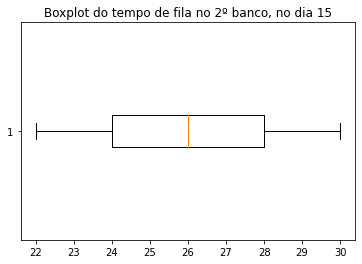

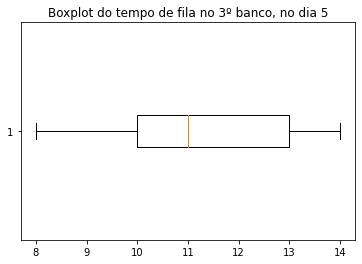

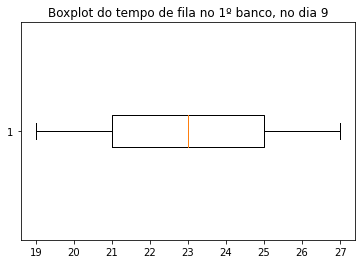

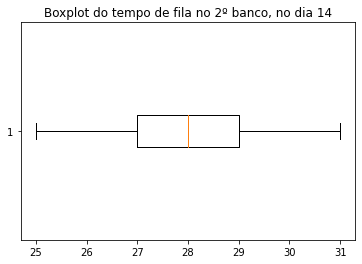

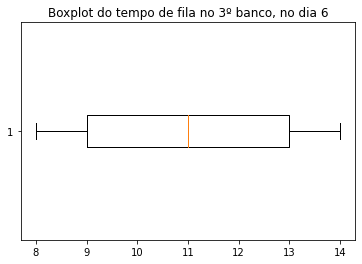

In [ ]:
banco = "FIRST BANK (WEEK 2)_4.csv"
banco_df = pd.DataFrame(dados[banco])
plt.boxplot(banco_df.tempo_fila, vert = 0, patch_artist = False)
plt.title('Boxplot do tempo de fila no 1º banco, dia 9')
plt.show()

banco = "SECOND BANK (WEEK 3)_2.csv"
banco_df = pd.DataFrame(dados[banco])
plt.boxplot(banco_df.tempo_fila, vert = 0, patch_artist = False)
plt.title('Boxplot do tempo de fila no 2º banco, no dia 12')
plt.show()

banco = "THIRD BANK (WEEK 1)_3.csv"
banco_df = pd.DataFrame(dados[banco])
plt.boxplot(banco_df.tempo_fila, vert = 0, patch_artist = False)
plt.title('Boxplot do tempo de fila no 3º banco, no dia 3')
plt.show()



banco = "FIRST BANK (WEEK 1)_1.csv"
banco_df = pd.DataFrame(dados[banco])
plt.boxplot(banco_df.tempo_fila, vert = 0, patch_artist = False)
plt.title('Boxplot do tempo de fila no 1º banco, no dia 1')
plt.show()

banco = "SECOND BANK (WEEK 3)_5.csv"
banco_df = pd.DataFrame(dados[banco])
plt.boxplot(banco_df.tempo_fila, vert = 0, patch_artist = False)
plt.title('Boxplot do tempo de fila no 2º banco, no dia 15')
plt.show()

banco = "THIRD BANK (WEEK 1)_5.csv"
banco_df = pd.DataFrame(dados[banco])
plt.boxplot(banco_df.tempo_fila, vert = 0, patch_artist = False)
plt.title('Boxplot do tempo de fila no 3º banco, no dia 5')
plt.show()



banco = "FIRST BANK (WEEK 2)_4.csv"
banco_df = pd.DataFrame(dados[banco])
plt.boxplot(banco_df.tempo_fila, vert = 0, patch_artist = False)
plt.title('Boxplot do tempo de fila no 1º banco, no dia 9')
plt.show()

banco = "SECOND BANK (WEEK 3)_4.csv"
banco_df = pd.DataFrame(dados[banco])
plt.boxplot(banco_df.tempo_fila, vert = 0, patch_artist = False)
plt.title('Boxplot do tempo de fila no 2º banco, no dia 14')
plt.show()

banco = "THIRD BANK (WEEK 2)_1.csv"
banco_df = pd.DataFrame(dados[banco])
plt.boxplot(banco_df.tempo_fila, vert = 0, patch_artist = False)
plt.title('Boxplot do tempo de fila no 3º banco, no dia 6')
plt.show()


In [ ]:
banco = "FIRST BANK (WEEK 2)_4.csv"
banco_df = pd.DataFrame(dados[banco])
print('Descrição dos dados relacionados ao tempo de fila no 1º banco, dia 9')
print(banco_df.tempo_fila.describe())

banco = "SECOND BANK (WEEK 3)_2.csv"
banco_df = pd.DataFrame(dados[banco])
print('\nDescrição dos dados relacionados ao fila no 2º banco, no dia 12')
print(banco_df.tempo_fila.describe())

banco = "THIRD BANK (WEEK 1)_3.csv"
banco_df = pd.DataFrame(dados[banco])
print('\nDescrição dos dados relacionados ao tempo de fila no 3º banco, no dia 3')
print(banco_df.tempo_fila.describe())



banco = "FIRST BANK (WEEK 1)_1.csv"
banco_df = pd.DataFrame(dados[banco])
print('\nDescrição dos dados relacionados ao tempo de fila no 1º banco, no dia 1')
print(banco_df.tempo_processamento.describe())

banco = "SECOND BANK (WEEK 3)_5.csv"
banco_df = pd.DataFrame(dados[banco])
print('\nDescrição dos dados relacionados ao tempo de fila no 2º banco, no dia 15')
print(banco_df.tempo_processamento.describe())

banco = "THIRD BANK (WEEK 1)_5.csv"
banco_df = pd.DataFrame(dados[banco])
print('\nDescrição dos dados relacionados ao tempo de fila no 3º banco, no dia 5')
print(banco_df.tempo_processamento.describe())



banco = "FIRST BANK (WEEK 2)_4.csv"
banco_df = pd.DataFrame(dados[banco])
print('\nDescrição dos dados relacionados ao tempo de fila no 1º banco, no dia 9')
print(banco_df.tempo_total.describe())

banco = "SECOND BANK (WEEK 3)_4.csv"
banco_df = pd.DataFrame(dados[banco])
print('\nDescrição dos dados relacionados ao tempo de fila no 2º banco, no dia 14')
print(banco_df.tempo_total.describe())

banco = "THIRD BANK (WEEK 2)_1.csv"
banco_df = pd.DataFrame(dados[banco])
print('\nDescrição dos dados relacionados ao tempo de fila no 3º banco, no dia 6')
print(banco_df.tempo_total.describe())


Descrição dos dados relacionados ao tempo de fila no 1º banco, dia 9
count    1021.000000
mean       22.978452
std         2.327063
min        19.000000
25%        21.000000
50%        23.000000
75%        25.000000
max        27.000000
Name: tempo_fila, dtype: float64

Descrição dos dados relacionados ao fila no 2º banco, no dia 12
count    685.000000
mean      22.944526
std        2.345798
min       19.000000
25%       21.000000
50%       23.000000
75%       25.000000
max       27.000000
Name: tempo_fila, dtype: float64

Descrição dos dados relacionados ao tempo de fila no 3º banco, no dia 3
count    921.000000
mean       6.995657
std        1.748907
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       10.000000
Name: tempo_fila, dtype: float64

Descrição dos dados relacionados ao tempo de fila no 1º banco, no dia 1
count    880.000000
mean      25.979545
std        1.754446
min       23.000000
25%       24.000000
50%       26.000000
75%       27.

Agora, analisaremos os horários de pico em cada banco, juntando todos os dados e observando o histograma de frequência gerado.

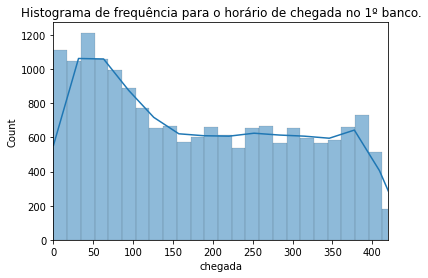

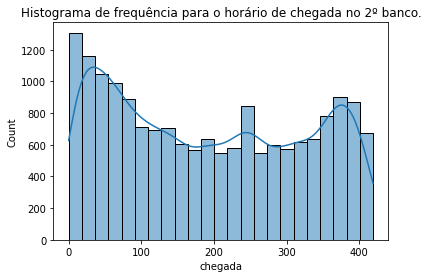

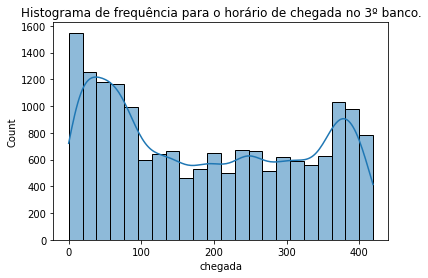

In [ ]:
banco1_df = pd.DataFrame(dados['FIRST BANK (WEEK 1)_1.csv'])
b = "FIRST"
for s in range(1,5): 
  if s == 1:
    for j in range(2,6):
      banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
      banco1_df = pd.concat([banco1_df, pd.DataFrame(dados[banco])]).sort_values(by='chegada', ignore_index=True)
  else:
    for j in range(1,6):
      banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
      banco1_df = pd.concat([banco1_df, pd.DataFrame(dados[banco])]).sort_values(by='chegada', ignore_index=True)


fig, ax = plt.subplots()
sns.histplot(banco1_df.chegada, kde = True, ax=ax)
ax.set_xlim(0,420)
plt.title('Histograma de frequência para o horário de chegada no 1º banco.')
plt.show()
#display(banco1_df)

banco2_df = pd.DataFrame(dados['SECOND BANK (WEEK 1)_1.csv'])
b = "SECOND"
for s in range(1,5): 
  if s == 1:
    for j in range(2,6):
      banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
      banco2_df = pd.concat([banco2_df, pd.DataFrame(dados[banco])]).sort_values(by='chegada', ignore_index=True)
  else:
    for j in range(1,6):
      banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
      banco2_df = pd.concat([banco2_df, pd.DataFrame(dados[banco])]).sort_values(by='chegada', ignore_index=True)

sns.histplot(banco2_df.chegada, kde = True)
plt.title('Histograma de frequência para o horário de chegada no 2º banco.')
plt.show()
#display(banco2_df)

banco3_df = pd.DataFrame(dados['THIRD BANK (WEEK 1)_1.csv'])
b = "THIRD"
for s in range(1,5): 
  if s == 1:
    for j in range(2,6):
      banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
      banco3_df = pd.concat([banco3_df, pd.DataFrame(dados[banco])]).sort_values(by='chegada', ignore_index=True)
  else:
    for j in range(1,6):
      banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
      banco3_df = pd.concat([banco3_df, pd.DataFrame(dados[banco])]).sort_values(by='chegada', ignore_index=True)

sns.histplot(banco3_df.chegada, kde = True)
plt.title('Histograma de frequência para o horário de chegada no 3º banco.')
plt.show()
#display(banco3_df)

Com esses gráficos, podemos ver que o público dos bancos se comporta de maneira semelhante em relação ao tempo de chegada. Os maiores picos são na hora de abertura e na última hora de funcionamento. Abaixo veremos os histogramas de frequência para o tempo de fila, o tempo de processameno das demandas e o tempo total no banco.

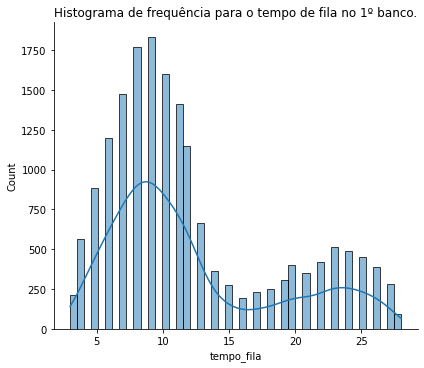

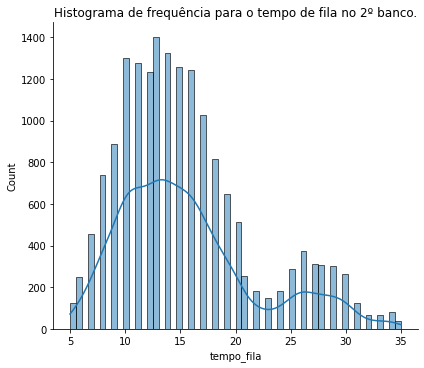

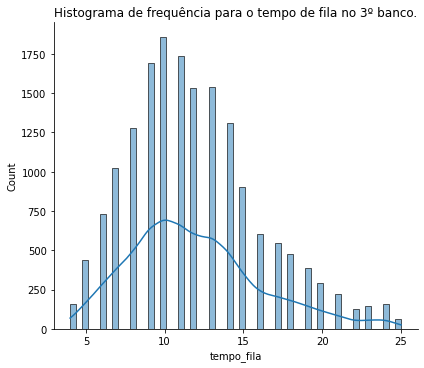

In [ ]:
sns.displot(banco1_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de fila no 1º banco.')
plt.show()

sns.displot(banco2_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de fila no 2º banco.')
plt.show()

sns.displot(banco3_df.tempo_fila, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de fila no 3º banco.')
plt.show()

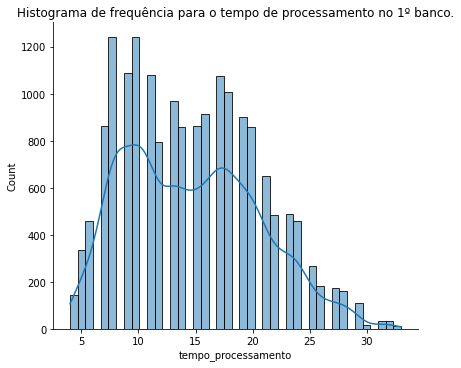

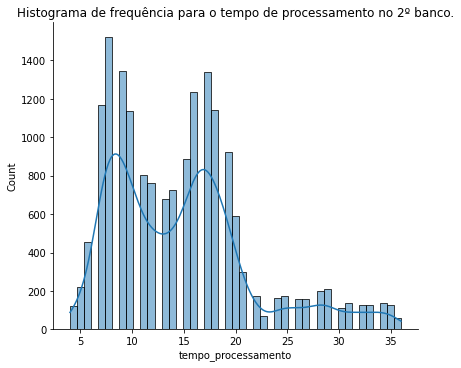

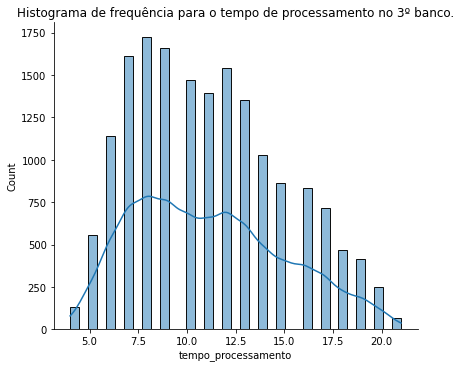

In [ ]:
sns.displot(banco1_df.tempo_processamento, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de processamento no 1º banco.')
plt.show()

sns.displot(banco2_df.tempo_processamento, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de processamento no 2º banco.')
plt.show()

sns.displot(banco3_df.tempo_processamento, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo de processamento no 3º banco.')
plt.show()

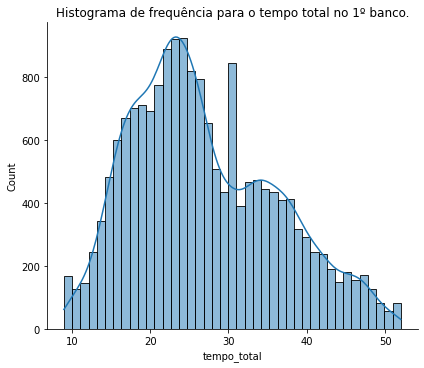

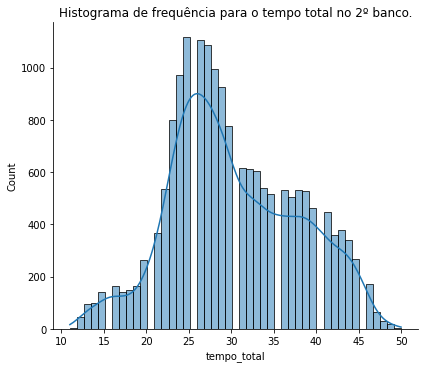

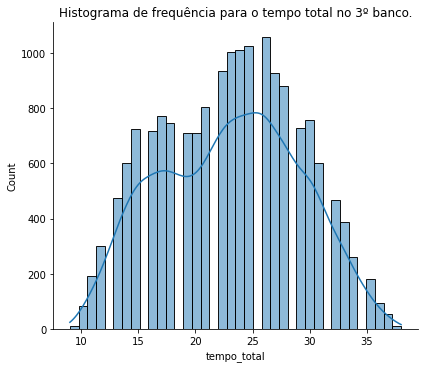

In [ ]:
sns.displot(banco1_df.tempo_total, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo total no 1º banco.')
plt.show()

sns.displot(banco2_df.tempo_total, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo total no 2º banco.')
plt.show()

sns.displot(banco3_df.tempo_total, kde = True, aspect = 1.2)
plt.title('Histograma de frequência para o tempo total no 3º banco.')
plt.show()

In [ ]:
b = 'FIRST'
qtds_clientes_pdia = []
for s in range(1,5): 
    for j in range(1,6):
      banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
      banco_df = pd.DataFrame(dados[banco])
      qtds_clientes_pdia.append(banco_df.shape[0])
qtds_clientes_pdia = pd.DataFrame(data = qtds_clientes_pdia)
print("Banco 1:\nTotal de clientes: %s\nMédia de clientes por dia: %s\nVariância: %s\nDesvio padrão: %s" %(qtds_clientes_pdia[0].sum(), qtds_clientes_pdia[0].mean(), qtds_clientes_pdia[0].var(), qtds_clientes_pdia[0].std()))
print("_______________________________________")

b = 'SECOND'
qtds_clientes_pdia = []
for s in range(1,5): 
    for j in range(1,6):
      banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
      banco_df = pd.DataFrame(dados[banco])
      qtds_clientes_pdia.append(banco_df.shape[0])
qtds_clientes_pdia = pd.DataFrame(data = qtds_clientes_pdia)
print("Banco 2:\nTotal de clientes: %s\nMédia de clientes por dia: %s\nVariância: %s\nDesvio padrão: %s" %(qtds_clientes_pdia[0].sum(), qtds_clientes_pdia[0].mean(), qtds_clientes_pdia[0].var(), qtds_clientes_pdia[0].std()))
print("_______________________________________")

b = 'THIRD'
qtds_clientes_pdia = []
for s in range(1,5): 
    for j in range(1,6):
      banco = b + " BANK (WEEK " + str(s)+ ")_" + str(j) + ".csv"
      banco_df = pd.DataFrame(dados[banco])
      qtds_clientes_pdia.append(banco_df.shape[0])
qtds_clientes_pdia = pd.DataFrame(data = qtds_clientes_pdia)

print("Banco 3:\nTotal de clientes: %s\nMédia de clientes por dia: %s\nVariância: %s\nDesvio padrão: %s" %(qtds_clientes_pdia[0].sum(), qtds_clientes_pdia[0].mean(), qtds_clientes_pdia[0].var(), qtds_clientes_pdia[0].std()))
print("_______________________________________")


Banco 1:
Total de clientes: 17789
Média de clientes por dia: 889.45
Variância: 26474.05
Desvio padrão: 162.70848164739292
_______________________________________
Banco 2:
Total de clientes: 17488
Média de clientes por dia: 874.4
Variância: 14191.936842105266
Desvio padrão: 119.12991581506833
_______________________________________
Banco 3:
Total de clientes: 17222
Média de clientes por dia: 861.1
Variância: 11988.621052631579
Desvio padrão: 109.49256163151713
_______________________________________
